In [3]:
%pip install --upgrade scipy

Requirement already up-to-date: scipy in c:\users\aldri\appdata\local\programs\python\python37\lib\site-packages (1.7.3)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [51]:
%pip install pydot

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
%pip install opencv-python pandas numpy matplotlib tensorflow keras scikit-learn imgaug

  Using cached https://files.pythonhosted.org/packages/c7/c3/55076fc728723ef927521abaa1955213d094933dc36d4a2008d5101e1af5/wheel-0.42.0-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [10]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import  layers , models ,optimizers
from tensorflow import  keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.utils import shuffle
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model
import imgaug.augmenters as iaa

In [12]:
dataset_path = 'Training/Training'
img_size = 250

train_data = []
train_labels = []
train_paths = []
# Iterate through the dataset directory
for img_name in os.listdir(dataset_path):
    
    if(img_name[:3] == 'not'):
      img_class = 'notsmoking'
    else :
      img_class = 'smoking'
    train_labels.append(img_class)
    img_path = os.path.join(dataset_path, img_name)
    train_paths.append(img_path)
    img = cv2.imread(img_path) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    train_data.append([img,img_class])

In [13]:
train_data[0][1]

'notsmoking'

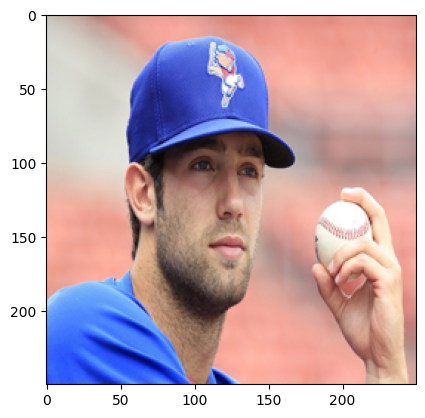

In [14]:
plt.imshow(train_data[0][0])

In [15]:
train_paths[:3]

['Training/Training\\notsmoking_0001.jpg',
 'Training/Training\\notsmoking_0002.jpg',
 'Training/Training\\notsmoking_0003.jpg']

In [16]:
train_labels[:3]

['notsmoking', 'notsmoking', 'notsmoking']

In [18]:
dataset_path = 'Testing/Testing'

test_data = []
test_labels = []
test_paths = []
# Iterate through the dataset directory
for img_name in os.listdir(dataset_path):
    if(img_name[:3] == 'not'):
      img_class = 'notsmoking'
    else :
      img_class = 'smoking'
    test_labels.append(img_class)
    img_path = os.path.join(dataset_path, img_name)
    test_paths.append(img_path)
    img = cv2.imread(img_path) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    test_data.append([img,img_class])

In [19]:
test_data[0][1]

'notsmoking'

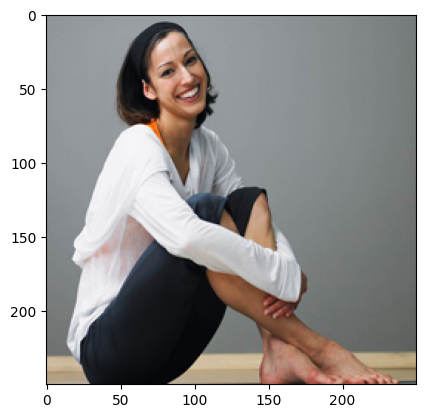

In [20]:
plt.imshow(test_data[0][0])

In [21]:
test_paths[:3]

['Testing/Testing\\notsmoking_0004.jpg',
 'Testing/Testing\\notsmoking_0014.jpg',
 'Testing/Testing\\notsmoking_0018.jpg']

In [22]:
test_labels[:3]

['notsmoking', 'notsmoking', 'notsmoking']

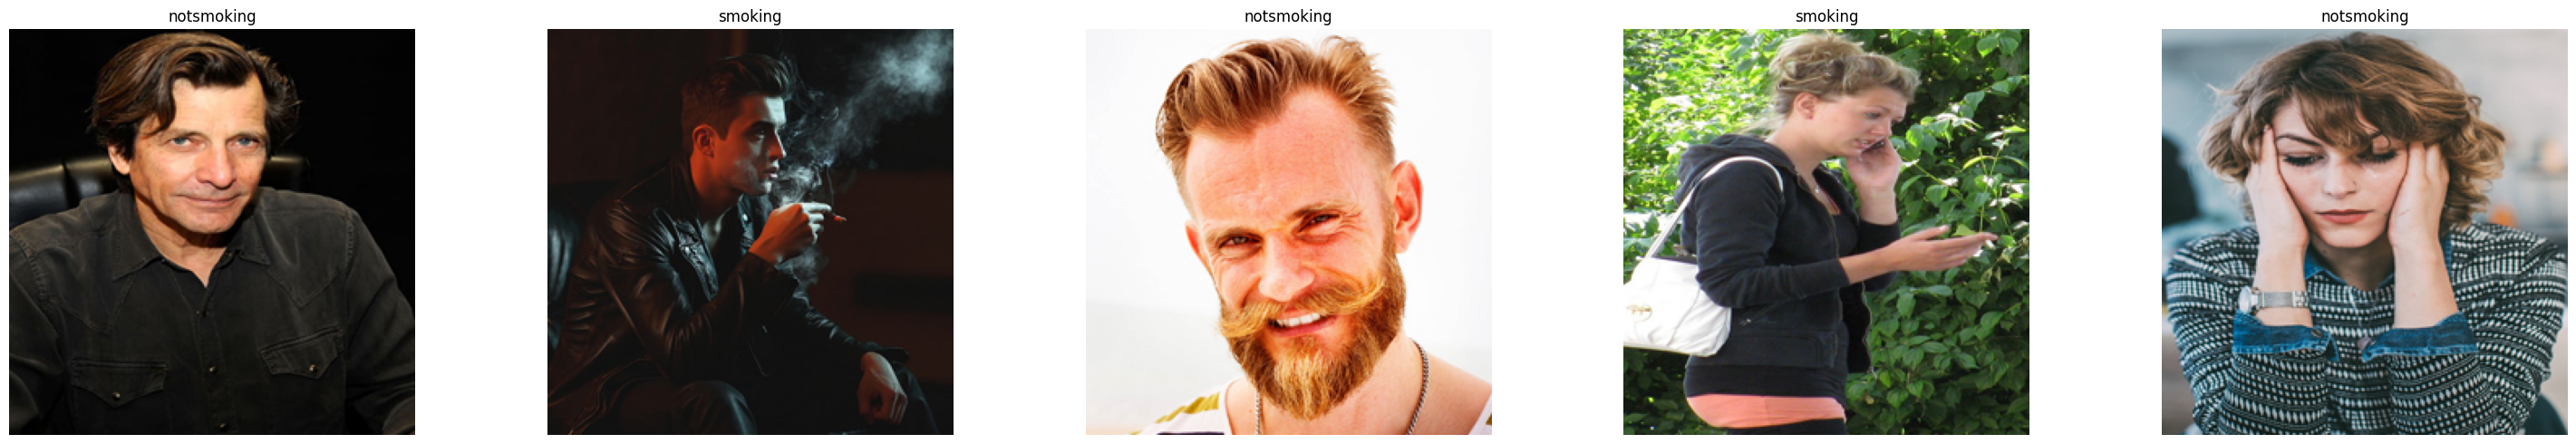

In [23]:
def display_random_images(images, labels, num_images=5):
    num_total_images = len(images)
    random_indices = np.random.choice(num_total_images, size=num_images, replace=False)
    
    fig, axes = plt.subplots(1, num_images, figsize=(30, 5))
    for i, idx in enumerate(random_indices):
        axes[i].imshow(images[idx][0])
       
        axes[i].set_title(labels[idx])
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

display_random_images(train_data, train_labels)

In [24]:
random.shuffle(train_data)
random.shuffle(test_data)

In [25]:
for item in train_data[:3]:
  print(item[1])

notsmoking
notsmoking
notsmoking


In [26]:
x_train , x_test , y_train , y_test = [] , [] , [] , []

def extract_splits(data):
    for features ,label  in data  :
        
        if(data == train_data):
            x_train.append(features)
            y_train.append(label)
        else:
            x_test.append(features)
            y_test.append(label)

In [27]:
extract_splits(train_data)

In [28]:
extract_splits(test_data)

In [29]:
x_train = np.array(x_train)
x_test = np.array(x_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

In [30]:
print("x_train shape ",x_train.shape)
print("y_train shape ",y_train.shape)

print("x_train shape ",x_test.shape)
print("y_train shape ",y_test.shape)

x_train shape  (716, 250, 250, 3)
y_train shape  (716,)
x_train shape  (224, 250, 250, 3)
y_train shape  (224,)


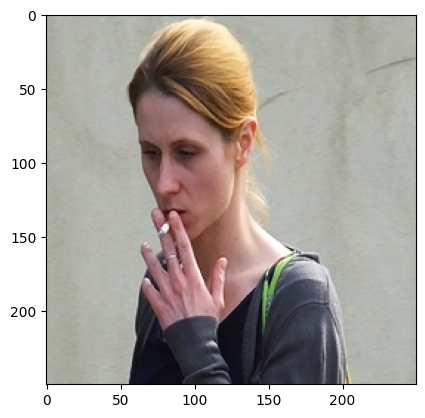

In [31]:
plt.imshow(x_train[3])

In [32]:
y_train[3]

'smoking'

In [33]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

In [34]:
y_train_encoded[0]

0

In [35]:
def display_seq_images(images, labels, num_images=5):
    num_total_images = len(images)
    
    fig, axes = plt.subplots(1, num_images, figsize=(30, 5))
    for i, idx in enumerate(range(num_images)):
        axes[i].imshow(images[idx], aspect='auto')
       
        axes[i].set_title(labels[idx])
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

In [36]:
def augment_images(images, labels, num_augmentations=4):
    augmented_images = []
    augmented_labels = []

    # Define augmentation sequence
    seq = iaa.Sequential([
        iaa.Fliplr(1.0),  # Horizontal flip with 100% probability
        iaa.Multiply((1.5, 2.5), per_channel=0.5)  # Adjust saturation
    ])

    # Apply augmentation to each image
    for original_image, label in zip(images, labels):
        augmented_images.append(original_image)  # Add original image
        augmented_labels.append(label)
        
        # Apply augmentation to create additional augmented images
        augmented_images.extend(seq(images=[original_image] * (num_augmentations)))
        augmented_labels.extend([label] * (num_augmentations))

    return np.array(augmented_images), np.array(augmented_labels)

num_augmentations = 4

# Apply augmentation to the entire training dataset
augmented_images,augmented_labels = augment_images(x_train,y_train_encoded ,num_augmentations)

In [37]:
y_train_encoded[0]

0

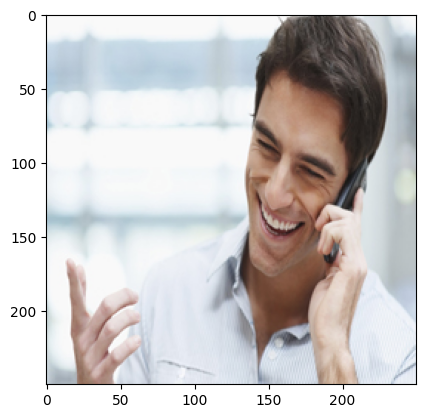

In [38]:
plt.imshow(augmented_images[0])

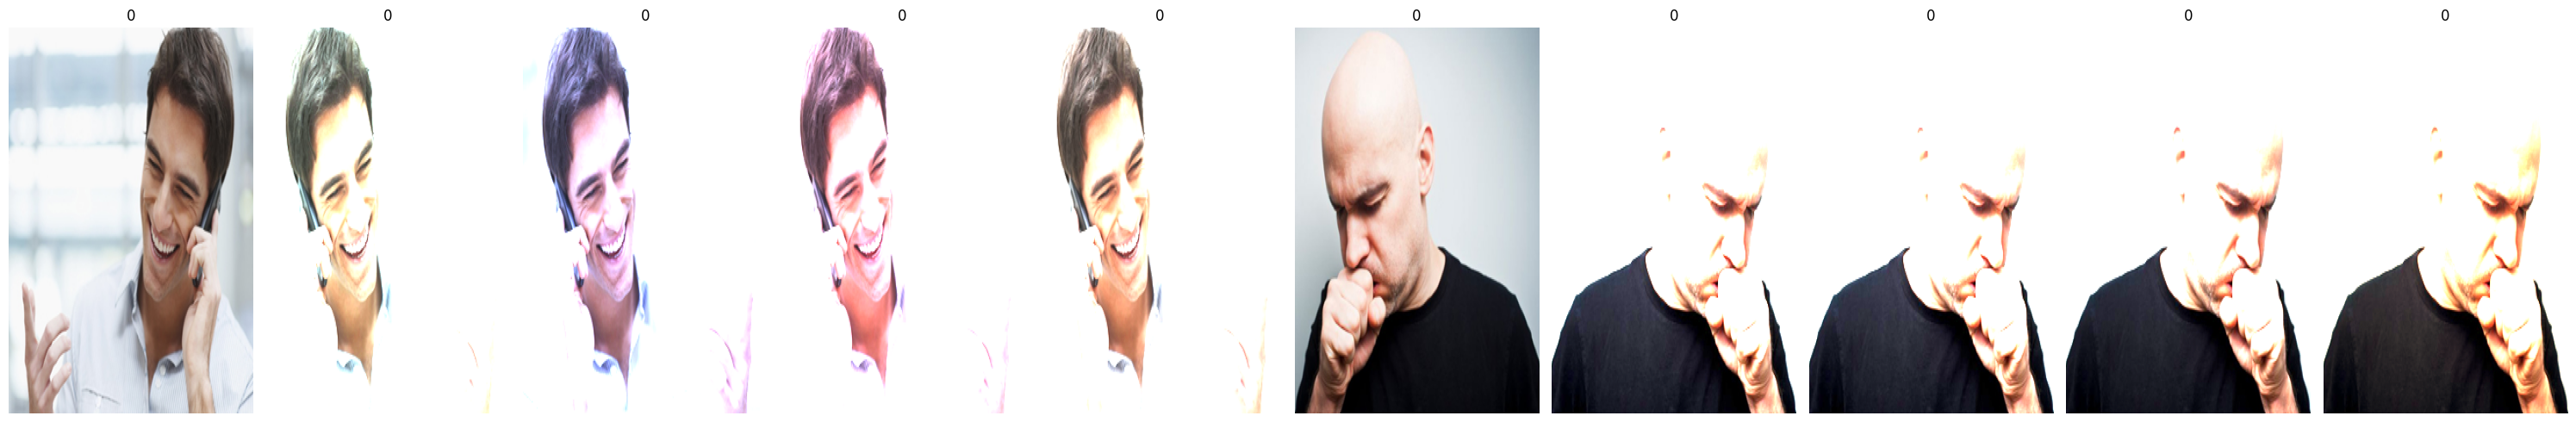

In [39]:
display_seq_images(augmented_images,augmented_labels,10)

In [40]:
augmented_images.shape

(3580, 250, 250, 3)

In [41]:
augmented_labels.shape

(3580,)

In [42]:
augmented_images[0].shape

(250, 250, 3)

In [43]:
preprocess_input = keras.applications.mobilenet_v3.preprocess_input

In [44]:
img_shape = augmented_images[0].shape
base_model = keras.applications.MobileNetV3Large(
    input_shape=img_shape,
    include_top=False,
    weights="imagenet",
 
)

12683000/12683000 [==============================] - 8s 1us/step


In [45]:
base_model.trainable = False
base_model.summary()

Model: "MobilenetV3large"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 250, 250, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 250, 250, 3)  0           ['input_1[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 125, 125, 16  432         ['rescaling[0][0]']              
                                )                                                                 
                                                                                   

In [46]:
# Build the model on top of the pre-trained base
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')  # Use 'softmax' activation for multi-class classification
])

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' for multi-class classification
              metrics=['accuracy'])

In [55]:
tf.keras.utils.plot_model(model , show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [56]:
augmented_labels[0].dtype

dtype('int64')

In [57]:
epochs=30

In [58]:
batch_size = 32

# Train the model with batches
history = model.fit(augmented_images, augmented_labels, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test_encoded))

Epoch 1/30
112/112 [==============================] - 86s 732ms/step - loss: 1.0591 - accuracy: 0.5299 - val_loss: 0.6577 - val_accuracy: 0.6295
Epoch 2/30
112/112 [==============================] - 76s 677ms/step - loss: 0.9053 - accuracy: 0.5813 - val_loss: 0.5253 - val_accuracy: 0.7277
Epoch 3/30
112/112 [==============================] - 78s 696ms/step - loss: 0.7805 - accuracy: 0.6383 - val_loss: 0.4523 - val_accuracy: 0.7857
Epoch 4/30
112/112 [==============================] - 78s 698ms/step - loss: 0.6998 - accuracy: 0.6757 - val_loss: 0.3999 - val_accuracy: 0.8214
Epoch 5/30
112/112 [==============================] - 82s 730ms/step - loss: 0.6616 - accuracy: 0.7006 - val_loss: 0.3620 - val_accuracy: 0.8482
Epoch 6/30
112/112 [==============================] - 82s 735ms/step - loss: 0.6213 - accuracy: 0.7168 - val_loss: 0.3325 - val_accuracy: 0.8661
Epoch 7/30
112/112 [==============================] - 78s 693ms/step - loss: 0.5814 - accuracy: 0.7372 - val_loss: 0.3230 - val_ac

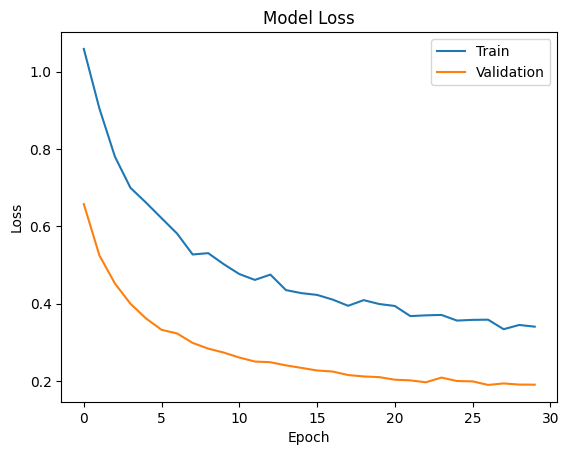

In [59]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [60]:
base_model.trainable = True

In [61]:
fine_tune_layers = 100 

for layer in base_model.layers[:fine_tune_layers]:
    layer.trainable = False

In [62]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.00001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [63]:
fine_tune_epochs = 25
total_epochs = epochs + fine_tune_epochs
batch_size = 32

# Train the model with batches
history_tuned = model.fit(augmented_images, augmented_labels, epochs=total_epochs,initial_epoch = history.epoch[-1], batch_size=batch_size, validation_data=(x_test, y_test_encoded))

Epoch 30/55
112/112 [==============================] - 174s 1s/step - loss: 0.5024 - accuracy: 0.7609 - val_loss: 0.1747 - val_accuracy: 0.9509
Epoch 31/55
112/112 [==============================] - 161s 1s/step - loss: 0.4020 - accuracy: 0.8193 - val_loss: 0.1694 - val_accuracy: 0.9554
Epoch 32/55
112/112 [==============================] - 162s 1s/step - loss: 0.3487 - accuracy: 0.8466 - val_loss: 0.1631 - val_accuracy: 0.9554
Epoch 33/55
112/112 [==============================] - 160s 1s/step - loss: 0.3122 - accuracy: 0.8642 - val_loss: 0.1574 - val_accuracy: 0.9554
Epoch 34/55
112/112 [==============================] - 162s 1s/step - loss: 0.2741 - accuracy: 0.8888 - val_loss: 0.1538 - val_accuracy: 0.9420
Epoch 35/55
112/112 [==============================] - 158s 1s/step - loss: 0.2520 - accuracy: 0.9036 - val_loss: 0.1491 - val_accuracy: 0.9420
Epoch 36/55
112/112 [==============================] - 159s 1s/step - loss: 0.2093 - accuracy: 0.9187 - val_loss: 0.1441 - val_accuracy:

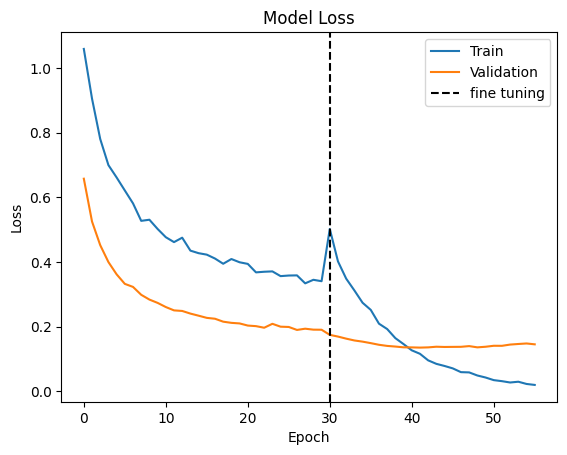

In [64]:
combined_loss = history.history['loss'] +  history_tuned.history['loss']
combined_val_loss = history.history['val_loss'] +  history_tuned.history['val_loss']

# Plot the combined loss values
plt.plot(combined_loss)
plt.plot(combined_val_loss)
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')


# Add a vertical line to visually separate the two training sessions
plt.axvline(x=len(history.history['loss']), color='k', linestyle='--')
plt.legend(['Train', 'Validation','fine tuning'], loc='upper right')

In [65]:
predictions = model.predict(x_test)

7/7 [==============================] - 6s 642ms/step


In [66]:
predictions[0]

array([0.31809625, 0.6819037 ], dtype=float32)

In [67]:
class_name = {1: 'smoking', 0: 'notsmoking'}
def plot_image(i,pred_array,true_label,img):
  pred_array , true_label , img= pred_array[i] , true_label[i] , img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img,cmap=plt.cm.binary)
  predicted_label = np.argmax(pred_array)

  
  if(predicted_label == true_label):
      color='blue'
  else:
     color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_name[predicted_label],
                                        100*np.max(pred_array),
                                        class_name[true_label])).set_color(color)
  plt.title("Image {}".format(i + 1))
  
def plot_activation_value(i,pred_array,true_label):
  pred_array , true_label = pred_array[i] , true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(2),pred_array,color="#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(pred_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  top_classes = np.argsort(pred_array)[-3:][::-1]
     

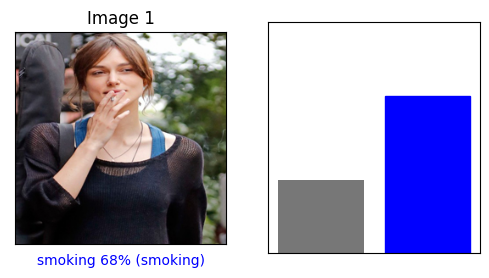

In [68]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i , predictions , y_test_encoded , x_test)
plt.subplot(1,2,2)
plot_activation_value(i,predictions,y_test_encoded)
plt.show()

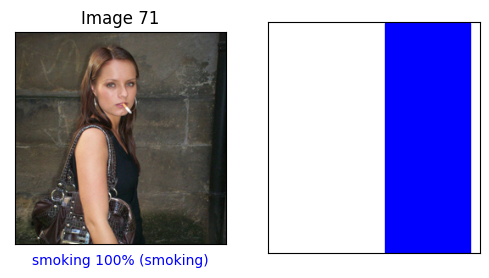

In [69]:
i=70
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i , predictions , y_test_encoded , x_test)
plt.subplot(1,2,2)
plot_activation_value(i,predictions,y_test_encoded)
plt.show()